## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [3]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
file_path = "data/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(file_path, compression='gzip')

In [4]:
df.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


In [5]:
# Display the number of articles
print(f"Number of articles: {len(df)}")

Number of articles: 30165


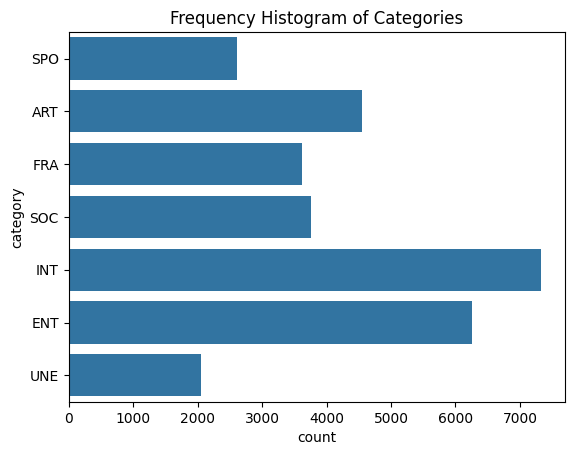

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE

# Step 2: Plot the frequency histogram of the categories

sns.countplot(data=df, y='category')
plt.title('Frequency Histogram of Categories')
plt.show()

In [7]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
sample_articles = df.sample(3)
for index, row in sample_articles.iterrows():
    print(f"Category: {row['category']}")
    print(f"Article: {row['text'][:500]}...")  # Display the first 500 characters of the article
    print("\n")

Category: ENT
Article: la direction juridique du groupe de médias et de communication a fait savoir qu'elle avait retrouvé l'origine de la différence entre les pouvoirs en blanc confiés au pdg du groupe enregistrés par l'ordinateur 64 millions de voix et ceux inscrits sur la feuille d'émargement 70 millions lors de l'assemblée générale du groupe le 24 avril 2002 le monde du 15 avril cette différence de 6 millions provient d'un institutionnel qui avait confié son pouvoir en blanc au président puis a décidé d'assister l...


Category: INT
Article: george bush et tony blair devaient se réunir jeudi 20 novembre à londres pour évoquer notamment l'avenir de l'irak auparavant le président américain devait saluer des familles de soldats britanniques tués avant et après la fin de la guerre l'écho de cette rencontre promettait toutefois d'être assourdi par les cris et les chants des quelque 100 000 manifestants hostiles à la guerre qui devaient défiler au coeur de londres à l'appel d'une coaliti

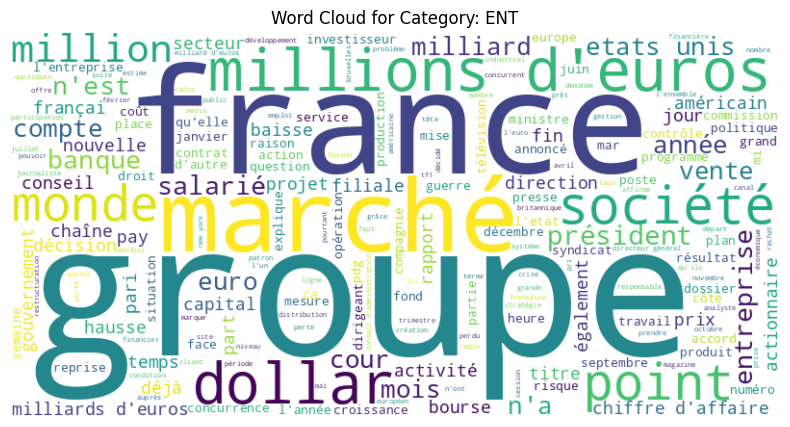

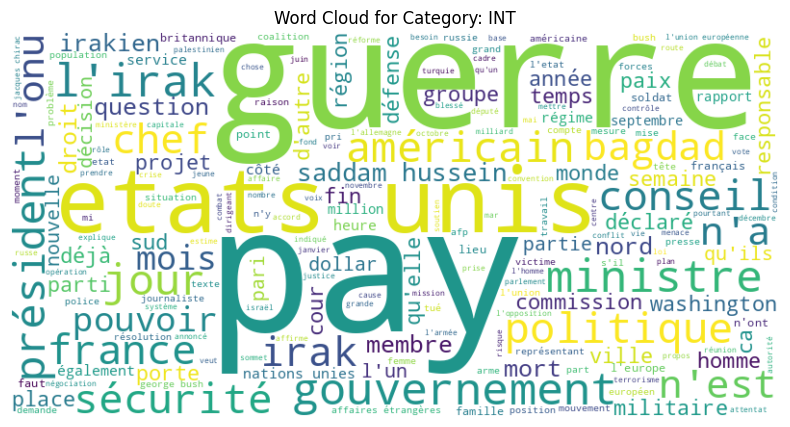

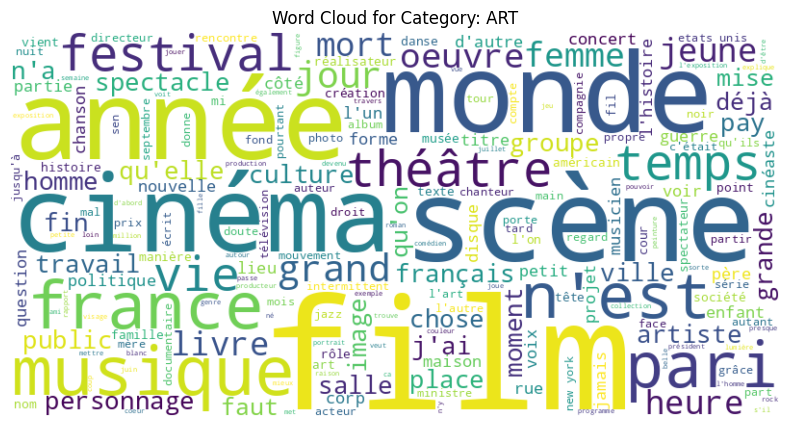

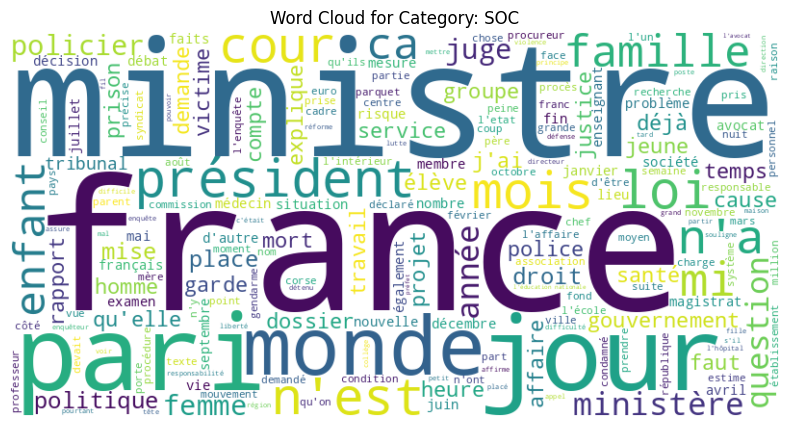

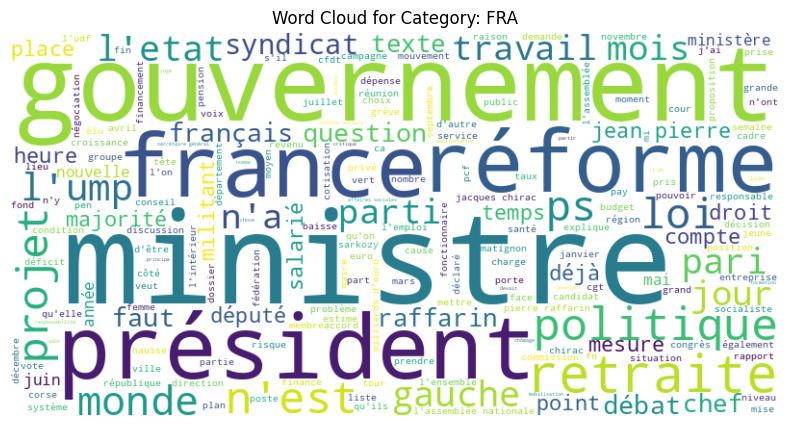

In [8]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # YOUR CODE HERE
    # Filter the DataFrame to get the text for the current category
    text = ' '.join(df[df['category'] == cat]['text'])

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {cat}')
    plt.axis('off')
    plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [9]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
# Split the dataset into train (80%), dev (10%), and test (10%) sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Extract features and labels
X_train = train_df['text']
y_train = train_df['category']
X_dev = dev_df['text']
y_dev = dev_df['category']
X_test = test_df['text']
y_test = test_df['category']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
# Transform the text of the articles into vectors using CountVectorizer
# fit on train data
vectorizer = CountVectorizer(max_features=1000)
X_train_counts = vectorizer.fit_transform(X_train)
# apply it on train and dev data
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [11]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
classifier = MultinomialNB()
# Train a Naive Bayes classifier
# Train 
classifier.fit(X_train_counts, y_train)
# Evaluate 
train_accuracy = classifier.score(X_train_counts, y_train)
dev_accuracy = classifier.score(X_dev_counts, y_dev)
test_accuracy = classifier.score(X_test_counts, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Dev Accuracy: {dev_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.7285
Dev Accuracy: 0.7142
Test Accuracy: 0.7305


In [12]:
# Calculate error rates
train_error_rate = 1 - train_accuracy
dev_error_rate = 1 - dev_accuracy
test_error_rate = 1 - test_accuracy

print(f"Train Error Rate: {train_error_rate:.4f}")
print(f"Dev Error Rate: {dev_error_rate:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f}")

Train Error Rate: 0.2715
Dev Error Rate: 0.2858
Test Error Rate: 0.2695


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
# Transform the count vectors into TF-IDF vectors
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_dev_tfidf = tfidf_transformer.transform(X_dev_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [14]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [15]:
# Evaluate the classification accuracy on the train, dev, and test sets
train_accuracy = classifier.score(X_train_tfidf, y_train)
dev_accuracy = classifier.score(X_dev_tfidf, y_dev)
test_accuracy = classifier.score(X_test_tfidf, y_test)

In [16]:
# Calculate error rates
train_error_rate = 1 - train_accuracy
dev_error_rate = 1 - dev_accuracy
test_error_rate = 1 - test_accuracy

print(f"Train Error Rate: {train_error_rate:.4f}")
print(f"Dev Error Rate: {dev_error_rate:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f}")

Train Error Rate: 0.2561
Dev Error Rate: 0.2686
Test Error Rate: 0.2542


In [17]:
# Define different configurations to test
configurations = [
    {'max_features': 1000, 'ngram_range': (1, 1), 'use_idf': True},
    {'max_features': 1000, 'ngram_range': (1, 2), 'use_idf': True},
    {'max_features': 2000, 'ngram_range': (1, 1), 'use_idf': True},
    {'max_features': 2000, 'ngram_range': (1, 2), 'use_idf': True},
    {'max_features': 1000, 'ngram_range': (1, 1), 'use_idf': False},
    {'max_features': 1000, 'ngram_range': (1, 2), 'use_idf': False},
    {'max_features': 2000, 'ngram_range': (1, 1), 'use_idf': False},
    {'max_features': 2000, 'ngram_range': (1, 2), 'use_idf': False}
]

best_test_error_rate = float('inf')
best_config = None

# Iterate over configurations and evaluate the classifier
for config in configurations:
    max_features = config['max_features']
    ngram_range = config['ngram_range']
    use_idf = config['use_idf']

    # Transform the text of the articles into vectors using CountVectorizer
    vectorizer = CountVectorizer(max_features=max_features, ngram_range=ngram_range)
    X_train_counts = vectorizer.fit_transform(X_train)
    X_dev_counts = vectorizer.transform(X_dev)
    X_test_counts = vectorizer.transform(X_test)

    # Transform the count vectors into TF-IDF vectors
    tfidf_transformer = TfidfTransformer(use_idf=use_idf)
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    X_dev_tfidf = tfidf_transformer.transform(X_dev_counts)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    # Train a Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_tfidf, y_train)

    # Evaluate the classification accuracy on the train, dev, and test sets
    train_accuracy = classifier.score(X_train_tfidf, y_train)
    dev_accuracy = classifier.score(X_dev_tfidf, y_dev)
    test_accuracy = classifier.score(X_test_tfidf, y_test)

    # Calculate error rates
    train_error_rate = 1 - train_accuracy
    dev_error_rate = 1 - dev_accuracy
    test_error_rate = 1 - test_accuracy

    print(f"Configuration: max_features={max_features}, ngram_range={ngram_range}, use_idf={use_idf}")
    print(f"Train Error Rate: {train_error_rate:.4f}")
    print(f"Dev Error Rate: {dev_error_rate:.4f}")
    print(f"Test Error Rate: {test_error_rate:.4f}\n")

    # Update best configuration if current test error rate is lower
    if test_error_rate < best_test_error_rate:
        best_test_error_rate = test_error_rate
        best_config = config

print(f"Best Configuration: {best_config}")
print(f"Best Test Error Rate: {best_test_error_rate:.4f}")

Configuration: max_features=1000, ngram_range=(1, 1), use_idf=True
Train Error Rate: 0.2561
Dev Error Rate: 0.2686
Test Error Rate: 0.2542

Configuration: max_features=1000, ngram_range=(1, 2), use_idf=True
Train Error Rate: 0.2816
Dev Error Rate: 0.2885
Test Error Rate: 0.2728

Configuration: max_features=2000, ngram_range=(1, 1), use_idf=True
Train Error Rate: 0.2216
Dev Error Rate: 0.2304
Test Error Rate: 0.2257

Configuration: max_features=2000, ngram_range=(1, 2), use_idf=True
Train Error Rate: 0.2408
Dev Error Rate: 0.2546
Test Error Rate: 0.2436

Configuration: max_features=1000, ngram_range=(1, 1), use_idf=False
Train Error Rate: 0.3211
Dev Error Rate: 0.3276
Test Error Rate: 0.3112

Configuration: max_features=1000, ngram_range=(1, 2), use_idf=False
Train Error Rate: 0.3423
Dev Error Rate: 0.3521
Test Error Rate: 0.3338

Configuration: max_features=2000, ngram_range=(1, 1), use_idf=False
Train Error Rate: 0.2716
Dev Error Rate: 0.2775
Test Error Rate: 0.2672

Configuration: ma

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


Classification Report:
              precision    recall  f1-score   support

         ART       0.79      0.88      0.83       466
         ENT       0.79      0.88      0.84       598
         FRA       0.66      0.69      0.68       357
         INT       0.79      0.90      0.84       750
         SOC       0.69      0.67      0.68       364
         SPO       0.94      0.83      0.88       278
         UNE       0.33      0.00      0.01       204

    accuracy                           0.77      3017
   macro avg       0.71      0.69      0.68      3017
weighted avg       0.75      0.77      0.75      3017



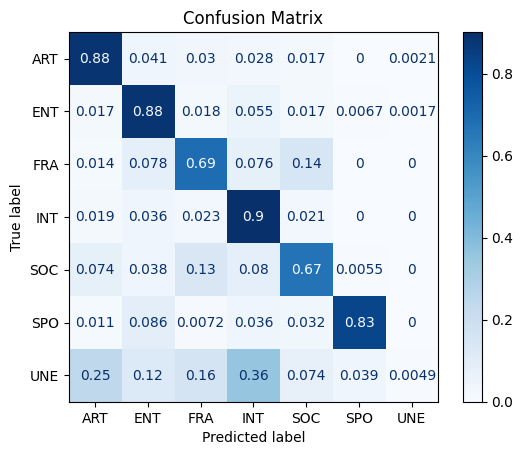

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# YOUR CODE HERE
config = best_config
max_features = config['max_features']
ngram_range = config['ngram_range']
use_idf = config['use_idf']

# Transform the text of the articles into vectors using CountVectorizer
vectorizer = CountVectorizer(max_features=max_features, ngram_range=ngram_range)
X_train_counts = vectorizer.fit_transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

# Transform the count vectors into TF-IDF vectors
tfidf_transformer = TfidfTransformer(use_idf=use_idf)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_dev_tfidf = tfidf_transformer.transform(X_dev_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test_tfidf)

# Report the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test_tfidf, y_test, display_labels=classifier.classes_, cmap='Blues', normalize='true')
disp.ax_.set_title('Confusion Matrix')
plt.show()

La classe avec le meilleur f1-score, avec une valeur de 0.88, est la catégorie "SPO" pour le sport, ce qui semble cohérent car le vocabulaire utilisé dans les articles de sport est a priori très spécifique aux disciplines sportives, et donc il est relativement simple de séparer les articles de sport des autres types d'articles.
On peut dire de même pour la catégorie "ART" par exemple.

On observe qua la plus grosse confusion a lieu entre la classe "UNE" et la classe "INT". De manière générale, les articles en une du journal sont les articles les plus importants et qui sont mis en avant, mais ils n'ont pas a priori de thème commumns, donc il est quasiment impossible de les reconnaitre via le vocabulaire employé. De plus, la classe "UNE" n'est pas exclusive avec les autres classes, dans le sens ou un article de sport peut très bien être mis en une du journal, il sera alors considéré de la classe "UNE" dans le dataset mais en réalité il devrait également conservé le label "SPO".

Notre modèle ne classifie donc jamais un article comme étant de la classe "UNE" mais prédit en fait son thème. Cela donne donc des réultats faux mais à tord en réalité. On peut donc voir que beaucoup d'article en une du monde parlent de thèmes internationaux (36%) ou d'arts (25%), à la précision de notre modèle près.

On peut également remarquer  que les catégories "FRA" et "SOC", pour france et société, sont également confondus (14% et 13% dans un sens et dans l'autre), se qui montre que le vocabulaires utilisé dans ces articles est relativement similaire. Cela cohérent par rapport à ces catégories qui sont assez similaire en elle même.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

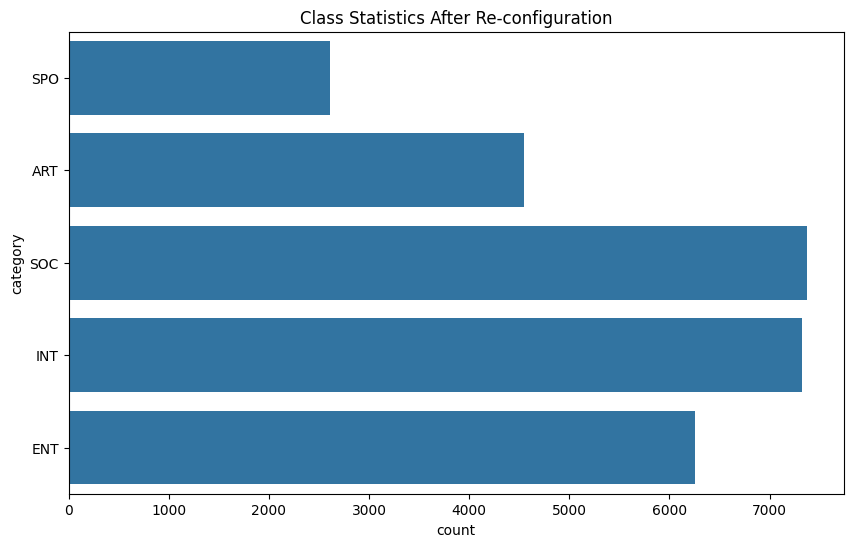

Classification Report:
              precision    recall  f1-score   support

         ART       0.84      0.83      0.83       460
         ENT       0.84      0.80      0.82       621
         INT       0.88      0.85      0.87       728
         SOC       0.77      0.89      0.83       738
         SPO       0.97      0.70      0.82       264

    accuracy                           0.84      2811
   macro avg       0.86      0.82      0.83      2811
weighted avg       0.84      0.84      0.84      2811



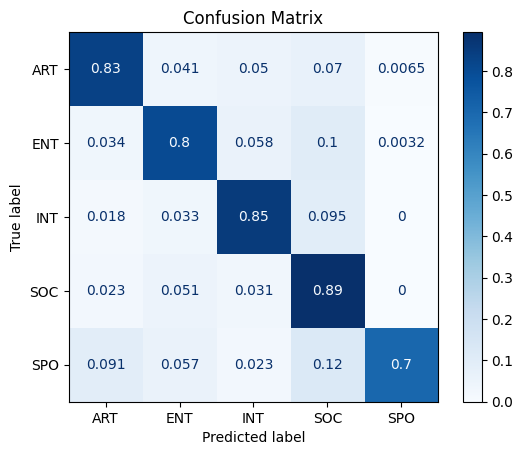

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
df = df[df['category'] != 'UNE']
df.loc[df['category'] == 'FRA', 'category'] = 'SOC'
# Plot the statistics of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category')
plt.title('Class Statistics After Re-configuration')
plt.show()
# Make the splits and print the sizes for checking
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

X_train = train_df['text']
y_train = train_df['category']
X_dev = dev_df['text']
y_dev = dev_df['category']
X_test = test_df['text']
y_test = test_df['category']
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_dev_tfidf = vectorizer.transform(X_dev)
X_test_tfidf = vectorizer.transform(X_test)
# Train MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
# Print accuracy
y_pred = classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print confusion matric
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test_tfidf, y_test, display_labels=classifier.classes_, cmap='Blues', normalize='true')
disp.ax_.set_title('Confusion Matrix')
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import time

# Load the dataset
csv_file_path = 'data/LeMonde2003_9classes.csv.gz'
df = pd.read_csv(csv_file_path, compression='gzip')

# Remove the class 'UNE' and merge 'FRANCE' and 'SOCIETE'
df = df[df['category'] != 'UNE']
df.loc[df['category'] == 'FRA', 'category'] = 'SOC'

# Create new splits
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract features and labels for the test set
X_test = test_df['text']
y_test = test_df['category']

# Choose a model for zero-shot classification
model_name = "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline("zero-shot-classification", model=model, tokenizer=tokenizer)

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


Le modèle ``MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7`` trouvé sur HF est un modèle de Zero-Shot classification pour le texte et compatible avec le français. C'est le meilleur que j'ai trouvé après en avoir testé quelque uns.

In [61]:
# Define the candidate labels and their mappings in French with more expressive descriptions
candidate_labels = [
    "article sur les entreprises et le monde des affaires",
    "article sur l'actualité internationale",
    "article sur les arts et la culture",
    "article sur la société française et les questions sociales",
    "article sur le sport"
]
label_mapping = {
    "article sur les entreprises et le monde des affaires": "ENT",
    "article sur l'actualité internationale": "INT",
    "article sur les arts et la culture": "ART",
    "article sur la société française et les questions sociales": "SOC",
    "article sur le sport": "SPO"
}

Ce type de label très explicite a plutôt bien fonctionné après quelques tests.

In [62]:
# Classify an example text
example_text = X_test.iloc[0]
result = classifier(example_text, candidate_labels)
print("Classification Result for Example Text:")
print(result)

Classification Result for Example Text:
{'sequence': 'premier tirage 5 6 13 18 36 41 complémentaire 44 pas de gagnant pour 6 numéros gagnant pour 5 numéros et complémentaire 21 658,30 5 numéros 901,20 4 numéros et complémentaire 38 4 numéros 19 3 numéros et complémentaire 8,20 3 numéros 4,10 second tirage 4 17 18 21 30 44 complémentaire 41 rapports pour 6 numéros 912 567 5 numéros et complémentaire 17 486,70 5 numéros 911,50 4 numéros et complémentaire 41,80 4 numéros 20,90 3 numéros et complémentaire 4,60 3 numéros 2,30', 'labels': ['article sur le sport', 'article sur la société française et les questions sociales', 'article sur les entreprises et le monde des affaires', 'article sur les arts et la culture', "article sur l'actualité internationale"], 'scores': [0.9180249571800232, 0.03507557511329651, 0.022624339908361435, 0.01783699356019497, 0.0064380900003015995]}


In [63]:
print(f"Par exemple pour le texte : {example_text[:100]}\n",
      f"Le modèle prédit label suivant : {result['labels'][0]}")

Par exemple pour le texte : premier tirage 5 6 13 18 36 41 complémentaire 44 pas de gagnant pour 6 numéros gagnant pour 5 numéro
 Le modèle prédit label suivant : article sur le sport


In [64]:
# Evaluate the model on the test set
correct_predictions = 0
total_articles = 100
processing_times = []

for i in range(total_articles):
    text = X_test.iloc[i]
    true_label = y_test.iloc[i]

    start_time = time.time()
    result = classifier(text, candidate_labels)
    end_time = time.time()

    predicted_label = label_mapping[result['labels'][0]]
    processing_times.append(end_time - start_time)

    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_articles
average_processing_time = sum(processing_times) / total_articles

print(f"Accuracy: {accuracy:.4f}")
print(f"Average Processing Time: {average_processing_time:.4f} seconds")

Accuracy: 0.7000
Average Processing Time: 0.3367 seconds


In [65]:
# Note model sizes and processing times
model_size = sum(p.numel() for p in model.parameters()) / 1e6  # Model size in millions of parameters
print(f"Model Size: {model_size:.2f} million parameters")

Model Size: 278.81 million parameters
